<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeProfundo/blob/master/notebooks/6a_autocodificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autocodificadores

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input

TensorFlow 2.x selected.


## Conjunto de datos de la flor Iris
Se carga el conjunto de datos Iris usando las funciones predefinidas de Keras:

In [0]:
iris = load_iris()
sc = StandardScaler()
X = sc.fit_transform(iris.data)
dim = X.shape[-1]

Se define el autocodificador con un espacio latente de 2 dimensiones, se entrena y se proyectan los vectores del conjunto de datos pasandolos por el codificador:

In [3]:
cod = Sequential([Dense(10, activation='sigmoid', input_shape=(dim,)),
                  Dense(2, activation='linear')])
dec = Sequential([Dense(10, activation='sigmoid', input_shape=(2,)),
                  Dense(dim, activation='linear')])
ac = Model(cod.inputs, dec(cod.outputs))

ac.compile(optimizer='adam', loss='mse')
ac.fit(X, X, epochs=500)
X_ac = cod.predict(X)

Train on 150 samples
Epoch 1/500
150/150 [==============================] - 1s 10ms/sample - loss: 1.4145
Epoch 2/500
150/150 [==============================] - 0s 166us/sample - loss: 1.3806
Epoch 3/500
150/150 [==============================] - 0s 111us/sample - loss: 1.3515
Epoch 4/500
150/150 [==============================] - 0s 102us/sample - loss: 1.3223
Epoch 5/500
150/150 [==============================] - 0s 92us/sample - loss: 1.2967
Epoch 6/500
150/150 [==============================] - 0s 90us/sample - loss: 1.2739
Epoch 7/500
150/150 [==============================] - 0s 92us/sample - loss: 1.2491
Epoch 8/500
150/150 [==============================] - 0s 104us/sample - loss: 1.2286
Epoch 9/500
150/150 [==============================] - 0s 102us/sample - loss: 1.2096
Epoch 10/500
150/150 [==============================] - 0s 88us/sample - loss: 1.1908
Epoch 11/500
150/150 [==============================] - 0s 100us/sample - loss: 1.1727
Epoch 12/500
150/150 [==============

Se visualizan los vectores latentes y se comparan con los producidos por _Principal Component Analysis_ (PCA):



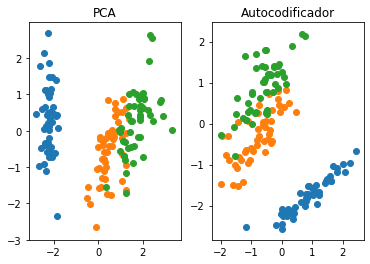

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2)
for i,n in enumerate(iris.target_names):
  ax1.scatter(X_pca[iris.target == i, 0], 
              X_pca[iris.target == i, 1], 
              label=n)
  ax1.set_title('PCA')
  ax2.scatter(X_ac[iris.target == i, 0], 
              X_ac[iris.target == i, 1], 
              label=n)
  ax2.set_title('Autocodificador')

## Conjunto de datos de vinos

Se carga el conjunto de datos Wine usando las funciones predefinidas de Keras:

In [0]:
vino = load_wine()
sc = StandardScaler()
X = sc.fit_transform(vino.data)
dim = X.shape[-1]

Se define el autocodificador con un espacio latente de 2 dimensiones, se entrena y se proyectan los vectores del conjunto de datos pasandolos por el codificador:

In [6]:
cod = Sequential([Dense(10, activation='sigmoid', input_shape=(dim,)),
                  Dense(2, activation='linear')])
dec = Sequential([Dense(10, activation='sigmoid', input_shape=(2,)),
                  Dense(dim, activation='linear')])
ac = Model(cod.inputs, dec(cod.outputs))

ac.compile(optimizer='adam', loss='mse')
ac.fit(X, X, epochs=500)
X_ac = cod.predict(X)

Train on 178 samples
Epoch 1/500
178/178 [==============================] - 0s 2ms/sample - loss: 1.1733
Epoch 2/500
178/178 [==============================] - 0s 108us/sample - loss: 1.1482
Epoch 3/500
178/178 [==============================] - 0s 105us/sample - loss: 1.1259
Epoch 4/500
178/178 [==============================] - 0s 104us/sample - loss: 1.1064
Epoch 5/500
178/178 [==============================] - 0s 91us/sample - loss: 1.0882
Epoch 6/500
178/178 [==============================] - 0s 96us/sample - loss: 1.0720
Epoch 7/500
178/178 [==============================] - 0s 97us/sample - loss: 1.0579
Epoch 8/500
178/178 [==============================] - 0s 122us/sample - loss: 1.0450
Epoch 9/500
178/178 [==============================] - 0s 121us/sample - loss: 1.0336
Epoch 10/500
178/178 [==============================] - 0s 113us/sample - loss: 1.0228
Epoch 11/500
178/178 [==============================] - 0s 96us/sample - loss: 1.0131
Epoch 12/500
178/178 [===============

Se visualizan los vectores latentes y se comparan con los producidos por _Principal Component Analysis_ (PCA):

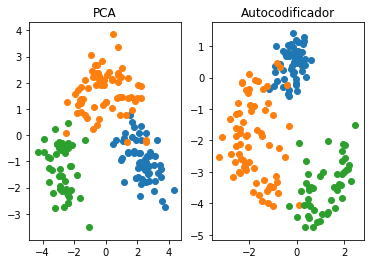

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2)
for i,n in enumerate(vino.target_names):
  ax1.scatter(X_pca[vino.target == i, 0], 
              X_pca[vino.target == i, 1],
              label=n)
  ax1.set_title('PCA')
  ax2.scatter(X_ac[vino.target == i, 0], 
              X_ac[vino.target == i, 1], 
              label=n)
  ax2.set_title('Autocodificador')

## Conjunto de datos de dígitos

Se carga el conjunto de datos Digits usando las funciones predefinidas de Keras:

In [0]:
digitos = load_digits()
sc = StandardScaler()
X = sc.fit_transform(digitos.data)
dim = X.shape[-1]

Se define el autocodificador con un espacio latente de 2 dimensiones, se entrena y se proyectan los vectores del conjunto de datos pasandolos por el codificador:

In [9]:
cod = Sequential([Dense(10, activation='sigmoid', input_shape=(dim,)),
                  Dense(2, activation='linear')])
dec = Sequential([Dense(10, activation='sigmoid', input_shape=(2,)),
                  Dense(dim, activation='linear')])
ac = Model(cod.inputs, dec(cod.outputs))

ac.compile(optimizer='adam', loss='mse')
ac.fit(X, X, epochs=500)
X_ac = cod.predict(X)

Train on 1797 samples
Epoch 1/500
1797/1797 [==============================] - 1s 278us/sample - loss: 0.9690
Epoch 2/500
1797/1797 [==============================] - 0s 83us/sample - loss: 0.9459
Epoch 3/500
1797/1797 [==============================] - 0s 89us/sample - loss: 0.9259
Epoch 4/500
1797/1797 [==============================] - 0s 81us/sample - loss: 0.8957
Epoch 5/500
1797/1797 [==============================] - 0s 87us/sample - loss: 0.8720
Epoch 6/500
1797/1797 [==============================] - 0s 80us/sample - loss: 0.8583
Epoch 7/500
1797/1797 [==============================] - 0s 84us/sample - loss: 0.8490
Epoch 8/500
1797/1797 [==============================] - 0s 76us/sample - loss: 0.8396
Epoch 9/500
1797/1797 [==============================] - 0s 84us/sample - loss: 0.8277
Epoch 10/500
1797/1797 [==============================] - 0s 83us/sample - loss: 0.8137
Epoch 11/500
1797/1797 [==============================] - 0s 89us/sample - loss: 0.8002
Epoch 12/500
1797/

Se visualizan los vectores latentes y se comparan con los producidos por _Principal Component Analysis_ (PCA):

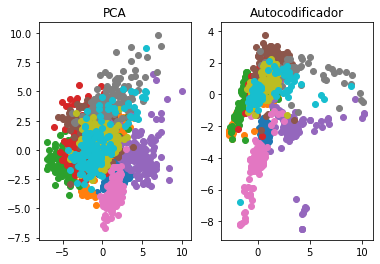

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2)
for i,n in enumerate(digitos.target_names):
  ax1.scatter(X_pca[digitos.target == i, 0], 
              X_pca[digitos.target == i, 1], 
              label=n)
  ax1.set_title('PCA')
  ax2.scatter(X_ac[digitos.target == i, 0], 
              X_ac[digitos.target == i, 1], 
              label=n)
  ax2.set_title('Autocodificador')